# Importing the data using Pandas

In [2]:
import pandas as pd
df = pd.read_csv('bank_data.csv')

# Graphical exploratory data analysis

## Age vs. Expected Recovery Amount

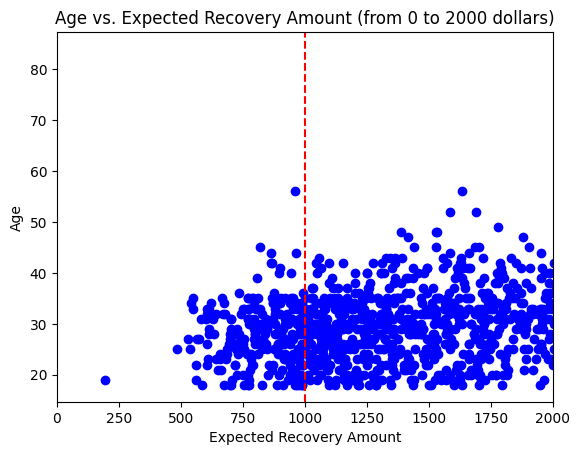

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['expected_recovery_amount'], df['age'], color="blue", marker="o")
plt.ylabel("Age")
plt.xlabel("Expected Recovery Amount")
plt.xlim(0,2000)
plt.title("Age vs. Expected Recovery Amount (from 0 to 2000 dollars)")
plt.axvline(x = 1000, color ="red", linestyle="--", label="Threshold")

### Carrying out Kruskal-Wallis test

In [4]:
import numpy as np
from scipy.stats import kruskal

expected_recovery_amount = np.array(df["expected_recovery_amount"])
ages = np.array(df["age"])

ages_below_threshold = ages[(expected_recovery_amount >= 900) & (expected_recovery_amount < 1000)]
ages_above_threshold = ages[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1100)]

statistic, p_value = kruskal(ages_below_threshold, ages_above_threshold)

print("Kruskal-Wallis Statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if(p_value <= alpha):
  print("There is a significant difference in the average age between the two groups") # Reject H0
else:
  print("There is no significant difference in the average age between the two groups") # Fail to Reject H0

Kruskal-Wallis Statistic: 3.1596647465950647
p-value: 0.07547868225791671
There is no significant difference in the average age between the two groups


**We conclude that there is no discontinuity in the age at the $1000 threshold**

## Sex vs. Expected Recovery Amount

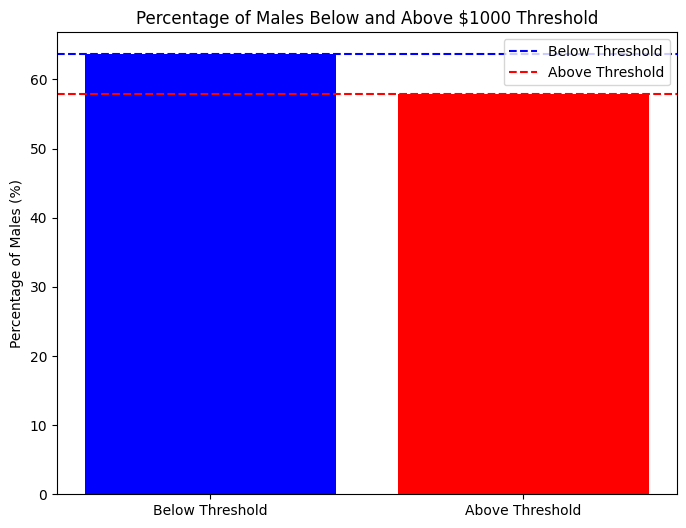

In [6]:
import matplotlib.pyplot as plt

# Calculate the percentage of males below and above the threshold
males_below_threshold = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1000) & (df['sex'] == 'Male')]
males_above_threshold = df[(df['expected_recovery_amount'] >= 1000) & (df['expected_recovery_amount'] <= 1100) & (df['sex'] == 'Male')]

sex_below_threshold = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1000)]
sex_above_threshold = df[(df['expected_recovery_amount'] >= 1000) & (df['expected_recovery_amount'] <= 1100)]

# Calculating percentage of males below and above $1000
percentage_below = len(males_below_threshold) / len(sex_below_threshold) * 100
percentage_above = len(males_above_threshold) / len(sex_above_threshold) * 100


# Plotting
plt.figure(figsize=(8, 6))

plt.bar(['Below Threshold', 'Above Threshold'], [percentage_below, percentage_above], color=['blue', 'red'])
plt.ylabel('Percentage of Males (%)')
plt.title('Percentage of Males Below and Above $1000 Threshold')

# Add horizontal line at the threshold
plt.axhline(y=percentage_below, color='blue', linestyle='--', label='Below Threshold')
plt.axhline(y=percentage_above, color='red', linestyle='--', label='Above Threshold')

plt.legend()
plt.show()


### Carrying out Two-sample Proportion test

In [49]:
import statsmodels.api as sm

# Performing two-sample proportion test
z_stat, p_value = sm.stats.proportions_ztest([len(males_below_threshold), len(males_above_threshold)],
                                                    [len(sex_below_threshold), len(sex_above_threshold)])
print("Z-Score:", z_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the percentage of males below and above the threshold.")
else:
    print("There is no significant difference in the percentage of males below and above the threshold.")


Z-Score: 0.7961036157477119
p-value: 0.4259718127420584
There is no significant difference in the percentage of males below and above the threshold.


**We conclude that there is no discontinuity in the percentage of males at the $1000 threshold**

## Actual Recovery Amount vs. Expected Recovery Amount

Text(0.5, 1.0, 'Actual Recovery Amount vs. Expected Recovery Amount')

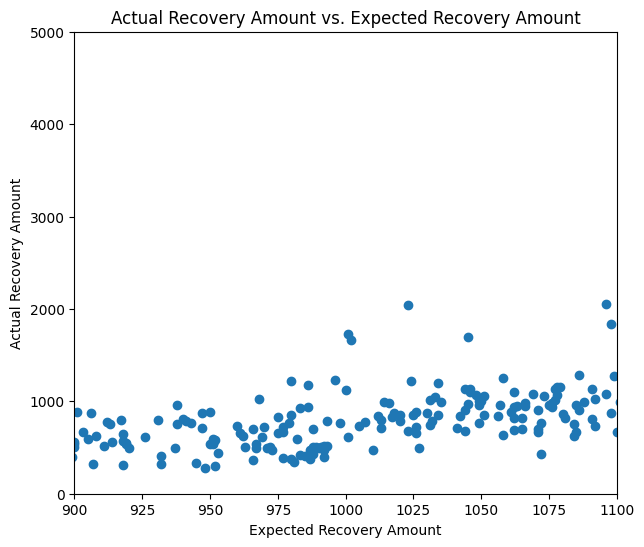

In [51]:
from matplotlib.pyplot import figure
fig = figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['expected_recovery_amount'], df['actual_recovery_amount'])
ax.set_ylim(0,5000)
ax.set_xlim(900, 1100)
ax.set_xlabel("Expected Recovery Amount")
ax.set_ylabel("Actual Recovery Amount")
ax.set_title("Actual Recovery Amount vs. Expected Recovery Amount")

### Carrying out Kruskal-Wallis test

In [9]:
expected_recovery_amount = np.array(df["expected_recovery_amount"])
actual_recovery_amount = np.array(df["actual_recovery_amount"])

# Getting actual recovery amounts for the wide range $900 to $1100
actual_below_threshold_wide = actual_recovery_amount[(expected_recovery_amount >= 900) & (expected_recovery_amount < 1000)]
actual_above_threshold_wide = actual_recovery_amount[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1100)]

# Getting actual recovery amounts for the narrow range $950 to $1050
actual_below_threshold_narrow = actual_recovery_amount[(expected_recovery_amount >= 950) & (expected_recovery_amount < 1000)]
actual_above_threshold_narrow = actual_recovery_amount[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1050)]

statistic_wide, p_value_wide = kruskal(actual_below_threshold_wide, actual_above_threshold_wide)
statistic_narrow, p_value_narrow = kruskal(actual_below_threshold_narrow, actual_above_threshold_narrow)

print("Kruskal-Wallis Statistic for ($900 to $1100) range:", statistic_wide)
print("p-value:", p_value_wide)
print("Kruskal-Wallis Statistic for ($950 to $1050) range:", statistic_narrow)
print("p-value:", p_value_narrow)

alpha = 0.05

if(p_value_wide <= alpha):
  print("There is a significant difference in the average of actual recovery amounts below and above the $1000 threshold for the ($900 to $1100) range") # Reject H0
else:
  print("There is no significant difference in the average of actual recovery amounts below and above the $1000 threshold for the ($900 to $1100) range") # Fail to Reject H0

if(p_value_narrow <= alpha):
  print("There is a significant difference in the average of actual recovery amounts below and above the $1000 threshold for the ($950 to $1050) range") # Reject H0
else:
  print("There is no significant difference in the average of actual recovery amounts below and above the $1000 threshold for the ($950 to $1050) range") # Fail to Reject H0

Kruskal-Wallis Statistic for ($900 to $1100) range: 67.38392708550032
p-value: 2.2346330990871586e-16
Kruskal-Wallis Statistic for ($950 to $1050) range: 33.0431604938272
p-value: 9.013556650854467e-09
There is a significant difference in the average of actual recovery amounts below and above the $1000 threshold for the ($900 to $1100) range
There is a significant difference in the average of actual recovery amounts below and above the $1000 threshold for the ($950 to $1050) range


**We conclude that there is a discontinuity in the actual recovery amount that is not visible in the scatter plot at the $1000 threshold**

# Regression Modeling: No threshold

In [62]:
import statsmodels.api as sm

# Model 1: Without a threshold
# Chossing the expected recovery amounts between $900 and $1100
era_900_1100 = df[(df['expected_recovery_amount'] > 900) & (df['expected_recovery_amount'] < 1100)]
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']

X = sm.add_constant(X)  # Adding a constant term (intercept)

model1 = sm.OLS(y, X).fit()  # Ordinary Least Squares regression
print("\nModel 1 (With No Indicator for Threshold):\n", model1.summary())



Model 1 (With No Indicator for Threshold):
                               OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.252
Model:                                OLS   Adj. R-squared:                  0.247
Method:                     Least Squares   F-statistic:                     59.85
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           7.34e-13
Time:                            16:57:52   Log-Likelihood:                -1259.4
No. Observations:                     180   AIC:                             2523.
Df Residuals:                         178   BIC:                             2529.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

# Regression Modeling: True threshold

In [63]:
# Model 2: With indicator for the threshold
# Adding indicator variable for the threshold (1000)
era_900_1100['above_threshold'] = (era_900_1100['expected_recovery_amount'] >= 1000).astype(int)

X2 = era_900_1100[['expected_recovery_amount', 'above_threshold']]
X2 = sm.add_constant(X2)  # Adding a constant term (intercept)

model2 = sm.OLS(y, X2).fit()  # Ordinary Least Squares regression
print("\nModel 2 (With Indicator for Threshold):\n", model2.summary())


Model 2 (With Indicator for Threshold):
                               OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.306
Model:                                OLS   Adj. R-squared:                  0.298
Method:                     Least Squares   F-statistic:                     39.05
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           8.95e-15
Time:                            16:57:55   Log-Likelihood:                -1252.6
No. Observations:                     180   AIC:                             2511.
Df Residuals:                         177   BIC:                             2521.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

<ipython-input-63-e058a3d6c3e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era_900_1100['above_threshold'] = (era_900_1100['expected_recovery_amount'] >= 1000).astype(int)


# Repeating the analysis for the window of expected recovery amount from 950 to 1050 dollars

In [67]:
era_950_1050 = df[(df['expected_recovery_amount'] > 950) & (df['expected_recovery_amount'] <= 1050)]

# Model 1: Without a threshold
X = era_950_1050['expected_recovery_amount']
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print("\nModel 1 (With No Indicator for Threshold):\n", model1.summary())

# Model 2: With a threshold
era_950_1050['above_threshold'] = (era_950_1050['expected_recovery_amount'] >= 1000).astype(int)
X2 = era_950_1050[['expected_recovery_amount', 'above_threshold']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print("\nModel 2 (With Indicator for Threshold):\n", model2.summary())


Model 1 (With No Indicator for Threshold):
                               OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.247
Model:                                OLS   Adj. R-squared:                  0.240
Method:                     Least Squares   F-statistic:                     31.55
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           1.89e-07
Time:                            16:58:39   Log-Likelihood:                -688.75
No. Observations:                      98   AIC:                             1382.
Df Residuals:                          96   BIC:                             1387.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

<ipython-input-67-9ff2e1c2c646>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era_950_1050['above_threshold'] = (era_950_1050['expected_recovery_amount'] >= 1000).astype(int)
